In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
%matplotlib inline

### 1. Построить нормальное гауссово распределение для двух переменных: x, y. Нарисовать их на плоскости (scatter plot).

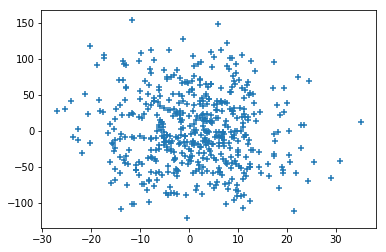

In [36]:
x = sts.norm(loc=1, scale =10).rvs(size=500)
y = sts.norm(loc=2, scale =50).rvs(size=500)
plt.scatter(x, y, marker='+')

In [4]:
#вариант 2, с рассчетом стандартного отклонения и среднего через методы np
x=np.random.randn(1000)
y=np.random.randn(1000)
sigma1=np.std(x)
mu1=np.mean(x)
sigma2=np.std(y)
mu2=np.mean(y)

### 2. Нарисовать плотность распределения полученной выборки x

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


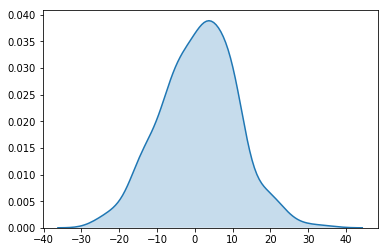

In [37]:
#sns.distplot(x)
sns.kdeplot(x, shade = True)

### 3. Изменить гауссово распределение с помощью матрицы масштабирования Scale = [[n, 0], [0, n]], где n - число, во сколько раз увеличиваем разброс данной выборки.

2


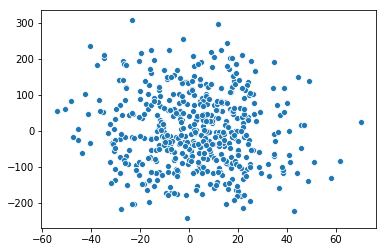

In [39]:
n = int(input())
#соединяем два вектора x и y в матрицу и транспонируем
Matrix = np.vstack((x, y)).T
Scale = np.array([[n, 0], [0, n]])
New_matrix = np.dot(Matrix,Scale)

sns.scatterplot(New_matrix[:, 0], New_matrix[:, 1])

### 4. Построить график зависимости (корелляции) x от y.
### 6. Посчитать коэффициент Пирсона для переменных x, y. Что означает положительное значение коэффициента? Отрицательное? 0?

-0.07113552793482239


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


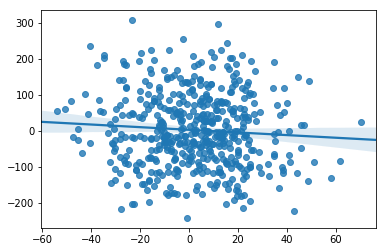

In [45]:
from scipy.stats import pearsonr
sns.regplot(New_matrix[:, 0], New_matrix[:, 1])
corr, p_value = pearsonr(x, y)
print(corr)

# + с увелечением x увеличивается y
# - с уменьшением x уменьшается y
# 0 линейной связи нет

#plt.plot( New_matrix[:, 0], New_matrix[:, 1], marker='.')


### 7. Сгенерировать равномерное распределение на отрезке [1, 10]. Нарисовать график плотности распределения. Чем оно отличается от нормального?

Text(0.5,0,'$x$')

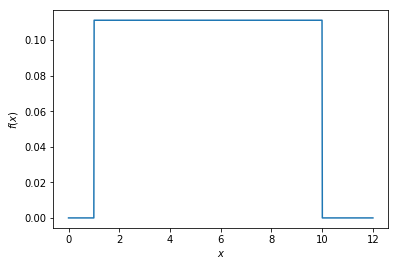

In [88]:
x = np.linspace(0,12,1000)
pdf = uniform_rv.pdf(x)
plt.plot(x, pdf)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

### 8. Найти на графике примеры выброса. Что они означают?

На графике есть выбросы, мин и макс значения, отклоняющиеся больше, чем на 2sd.

### 9. Найти корелляцию в следующих данных:

In [4]:
from scipy.stats import pearsonr
df=pd.read_csv("/Users/peter/Downloads/avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
#оставим только столбики с диджит, откинем первый столбец
df = df._get_numeric_data().iloc[:,1:]
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015


In [6]:
from sklearn import preprocessing
#провдем нормирование от 0 до 1
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
np_scaled = scaler.fit_transform(df)
df_new = pd.DataFrame(np_scaled)
df_new.head()

,0,1,2,3,4,5,6,7,8,9
0,0.316726,0.001026,0.000046,0.002660,0.000019,0.000449,0.000643,0.000016,0.0,0.0
1,0.323843,0.000877,0.000030,0.002181,0.000023,0.000491,0.000703,0.000017,0.0,0.0
2,0.174377,0.001890,0.000035,0.005332,0.000051,0.000420,0.000601,0.000018,0.0,0.0
3,0.227758,0.001262,0.000050,0.003516,0.000029,0.000300,0.000424,0.000023,0.0,0.0
4,0.298932,0.000815,0.000041,0.002142,0.000030,0.000319,0.000447,0.000035,0.0,0.0


In [8]:
df.corr()
#sns.pairplot(df_new)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


#### Ожидаемо высокая корреляция между Total Volume и Total Bags

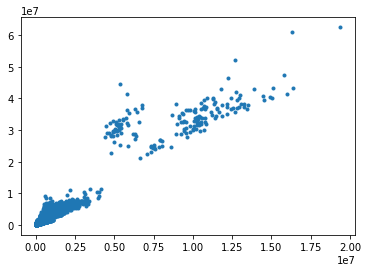

In [11]:
x = df['Total Bags'].tolist()
y = df['Total Volume'].tolist()
plt.scatter(x, y, marker='.')